In [29]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D   
from matplotlib import cm

np.random.seed(42)

In [3]:
def plot(X, Y, Z):
    plt.figure(figsize=(10, 6))
    count = plt.contourf(X, Y, Z, cmap=cm.jet)
    plt.colorbar(count)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [84]:
def createPDF(F):
    I = spint.dblquad(F, 0, 1, gfun=(lambda y: 0), hfun=(lambda y: 1))
    newF = lambda x, y: F(y, x) / I[0]
    return newF

In [85]:
f = lambda x, y: np.cos(.5*(x-1)) * np.sin(.5*(y-.1))

In [86]:
def F(y, x):
    return f(x, y)

In [87]:
N = 100
x = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, x)

In [88]:
FF = createPDF(F)

In [89]:
inte2 = spint.dblquad(FF, 0, 1, gfun=(lambda y: 0), hfun=(lambda y: 1))

In [90]:
inte2

(1.0000000000000002, 2.4506999352381634e-14)

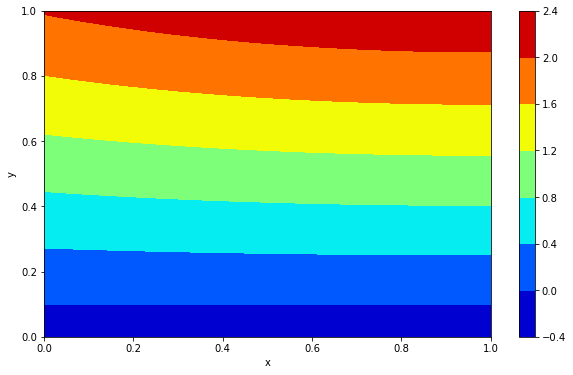

In [91]:
plot(X, Y, FF(X, Y))

In [92]:
G = lambda x, y: np.exp(-(x**2 + y**2))

In [95]:
f2 = lambda x, y: .4*G(2*x, 2*y) + .25*G(1.5*x-1, 1.5*y-1) + .9*G(2*x+5, 2*y+5)

In [96]:
def F2(y, x):
    return f2(x, y)

In [97]:
FF2 = createPDF(F2)

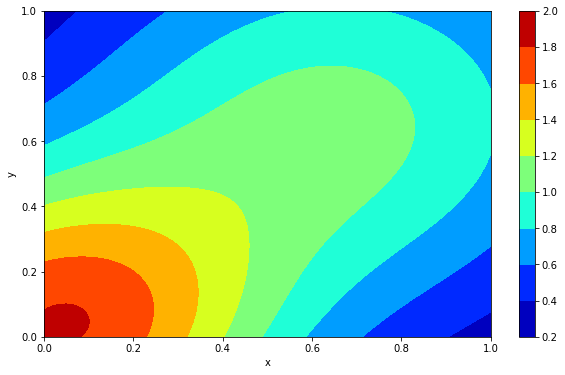

In [98]:
plot(X, Y, FF2(X, Y))

In [99]:
def move(D):
    d = (1/5)*D
    tmp = D + np.roll(d, 1, axis=0) + np.roll(d, -1, axis=0) + np.roll(d, 1, axis=1) + np.roll(d, -1, axis=1)
    return d

In [101]:
moveFF2 = move(FF2(X, Y))

In [103]:
move2FF2 = move(moveFF2)

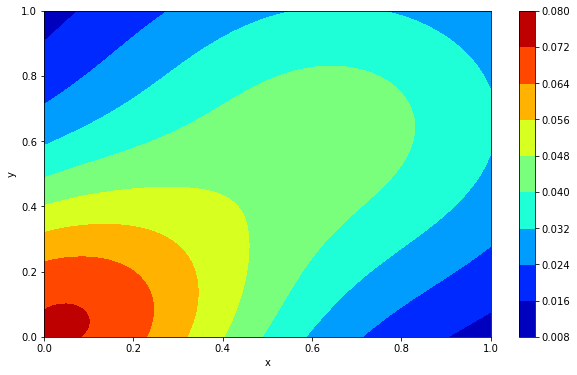

In [104]:
plot(X, Y, move2FF2)